In [156]:
#Loading packages and settings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns',1000,'max_rows',1000)

In [157]:
#Importing train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [158]:
#Concatenating
pre_processing_data = pd.concat([train_data.drop(['SalePrice','Id'], axis=1), test_data.drop(['Id'], axis=1)], axis=0)
pre_processing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [159]:
#Finding out variables including null values
counting = dict((k,v) for k,v in pre_processing_data.isnull().sum().to_dict().items() if v != 0)
missing_value = pd.DataFrame({'Missing_value' : pre_processing_data.isnull().sum(), 'Original_type' : pre_processing_data[list(counting.keys())].dtypes}, index = list(counting.keys())).sort_values('Missing_value', ascending = False)
missing_value.head()

,Missing_value,Original_type
PoolQC,2909,object
MiscFeature,2814,object
Alley,2721,object
Fence,2348,object
FireplaceQu,1420,object


In [160]:
#Checking nulls' identity : np.nan
for i in list(counting.keys()):
    print(i)
    print(pre_processing_data[pre_processing_data[i].isnull()][i][0:3])

MSZoning
455    NaN
756    NaN
790    NaN
Name: MSZoning, dtype: object
LotFrontage
7    NaN
12   NaN
14   NaN
Name: LotFrontage, dtype: float64
Alley
0    NaN
1    NaN
2    NaN
Name: Alley, dtype: object
Utilities
455    NaN
485    NaN
Name: Utilities, dtype: object
Exterior1st
691    NaN
Name: Exterior1st, dtype: object
Exterior2nd
691    NaN
Name: Exterior2nd, dtype: object
MasVnrType
234    NaN
529    NaN
650    NaN
Name: MasVnrType, dtype: object
MasVnrArea
234   NaN
529   NaN
650   NaN
Name: MasVnrArea, dtype: float64
BsmtQual
17    NaN
39    NaN
90    NaN
Name: BsmtQual, dtype: object
BsmtCond
17    NaN
39    NaN
90    NaN
Name: BsmtCond, dtype: object
BsmtExposure
17    NaN
39    NaN
90    NaN
Name: BsmtExposure, dtype: object
BsmtFinType1
17    NaN
39    NaN
90    NaN
Name: BsmtFinType1, dtype: object
BsmtFinSF1
660   NaN
Name: BsmtFinSF1, dtype: float64
BsmtFinType2
17    NaN
39    NaN
90    NaN
Name: BsmtFinType2, dtype: object
BsmtFinSF2
660   NaN
Name: BsmtFinSF2, dtype: f

In [161]:
#Convert missing values string to 'None' and float to 0
for i in missing_value.index:
    if pre_processing_data[i].dtypes == 'object':
        pre_processing_data[i][pre_processing_data[i].isnull()] = 'None'
    else:
        pre_processing_data[i][pre_processing_data[i].isnull()] = 0

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [162]:
#Check missing value again : nothing
counting = dict((k,v) for k,v in pre_processing_data.isnull().sum().to_dict().items() if v != 0)
missing_value = pd.DataFrame({'Missing_value' : pre_processing_data.isnull().sum(), 'Original_type' : pre_processing_data[list(counting.keys())].dtypes}, index = list(counting.keys())).sort_values('Missing_value', ascending = False)
missing_value.head()

,Missing_value,Original_type


In [163]:
#Classifying 79 variables to some groups
int_set = set([])
float_set = set([])
object_set = set([])

for i in list(pre_processing_data):
    if pre_processing_data[i].dtype == 'int64':
        int_set.add(i)
    elif pre_processing_data[i].dtype == 'float64':
        float_set.add(i)
    else:
        object_set.add(i)
        
len(int_set) + len(float_set) + len(object_set)

79

In [164]:
numerical_set = {'1stFlrSF', '2ndFlrSF', '3SsnPorch', 'EnclosedPorch', 'GrLivArea', 'LotArea', 'LowQualFinSF', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageArea', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF', 'WoodDeckSF'}
counting_set = {'BedroomAbvGr', 'Fireplaces', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars'}
preference_set = {'MSSubClass', 'Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street'}
score_set = {'OverallCond', 'OverallQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Electrical', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual', 'PavedDrive', 'PoolQC', 'Utilities'}
date_set = {'MoSold', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'}

In [165]:
len(numerical_set) + len(counting_set) + len(score_set) + len(date_set) + len(preference_set)

79

In [166]:
train_temp = pre_processing_data[:train_data.shape[0]]
train_temp['SalePrice'] = train_data['SalePrice']

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


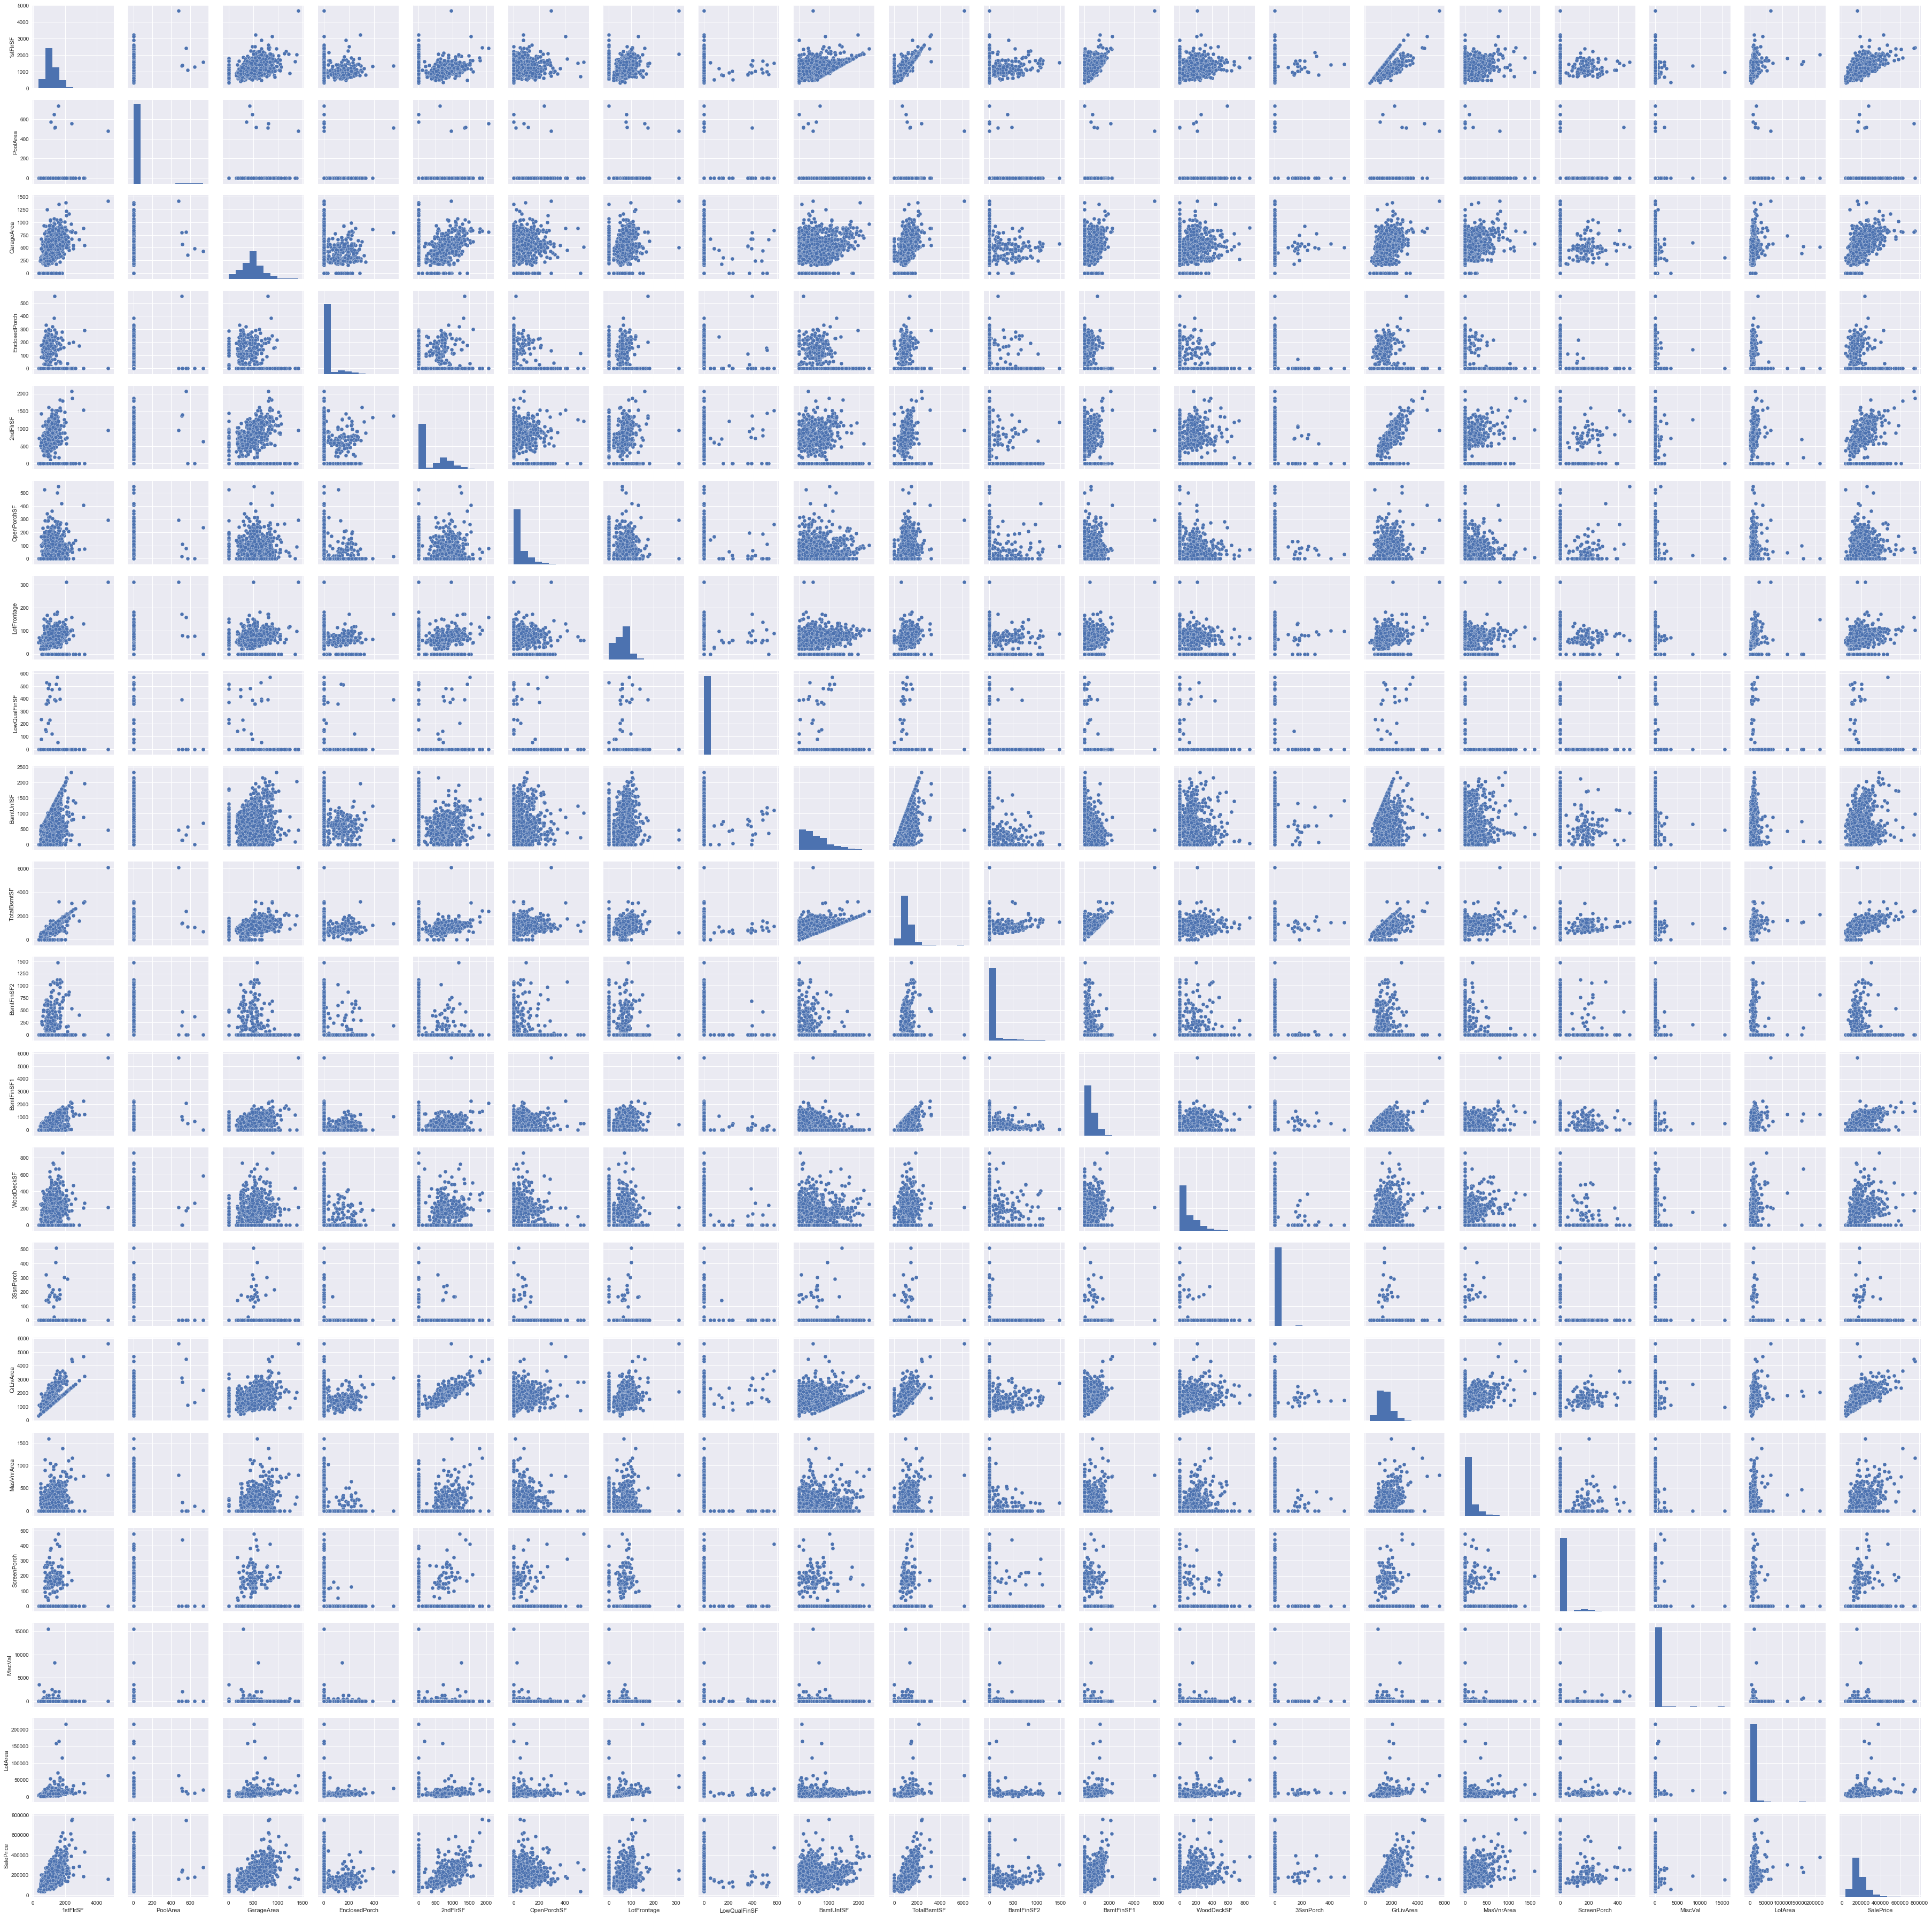

In [167]:
sns.set()
cols = list(numerical_set) + ['SalePrice']
sns.pairplot(train_temp[cols], size = 2.5)
plt.show()

In [168]:
#Feature engineering - Numerical variables
numerical_corr = pd.DataFrame(train_temp[list(numerical_set) + ['SalePrice']].corr().loc['SalePrice']).sort_values('SalePrice', ascending = False)
numerical_description = ['Itself','Above grade (ground) living area square feet','Size of garage in square feet','Total square feet of basement area','First Floor square feet','Masonry veneer area in square feet','Type 1 finished square feet','Wood deck area in square feet','Second floor square feet','Open porch area in square feet','Lot size in square feet','Unfinished square feet of basement area','Linear feet of street connected to property','Screen porch area in square feet','Pool area in square feet','Three season porch area in square feet','Type 2 finished square feet','$Value of miscellaneous feature','Low quality finished square feet (all floors)','Enclosed porch area in square feet']
numerical_corr['Description'] = numerical_description
numerical_corr

,SalePrice,Description
SalePrice,1.000000,Itself
GrLivArea,0.708624,Above grade (ground) living area square feet
GarageArea,0.623431,Size of garage in square feet
TotalBsmtSF,0.613581,Total square feet of basement area
1stFlrSF,0.605852,First Floor square feet
MasVnrArea,0.472614,Masonry veneer area in square feet
BsmtFinSF1,0.386420,Type 1 finished square feet
WoodDeckSF,0.324413,Wood deck area in square feet
2ndFlrSF,0.319334,Second floor square feet
OpenPorchSF,0.315856,Open porch area in square feet


In [169]:
#Who are your friends?
for i in numerical_corr.index:
    print(i)
    print(train_temp[list(numerical_set) + ['SalePrice']].corr().loc[i].sort_values())
    
#Group1 : 


SalePrice
EnclosedPorch   -0.128578
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
PoolArea         0.092404
ScreenPorch      0.111447
LotFrontage      0.209624
BsmtUnfSF        0.214479
LotArea          0.263843
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
BsmtFinSF1       0.386420
MasVnrArea       0.472614
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GrLivArea        0.708624
SalePrice        1.000000
Name: SalePrice, dtype: float64
GrLivArea
BsmtFinSF2      -0.009640
MiscVal         -0.002416
EnclosedPorch    0.009113
3SsnPorch        0.020643
ScreenPorch      0.101510
LowQualFinSF     0.134683
PoolArea         0.170205
BsmtFinSF1       0.208171
LotFrontage      0.220347
BsmtUnfSF        0.240257
WoodDeckSF       0.247433
LotArea          0.263116
OpenPorchSF      0.330224
MasVnrArea       0.388052
TotalBsmtSF      0.454868
GarageArea       0.468997
1stFlrSF    

SalePrice       -0.128578
WoodDeckSF      -0.125989
GarageArea      -0.121777
MasVnrArea      -0.109907
BsmtFinSF1      -0.102303
TotalBsmtSF     -0.095478
OpenPorchSF     -0.093079
ScreenPorch     -0.082864
1stFlrSF        -0.065292
3SsnPorch       -0.037305
LotArea         -0.018340
BsmtUnfSF       -0.002538
GrLivArea        0.009113
MiscVal          0.018361
LotFrontage      0.027366
BsmtFinSF2       0.036543
PoolArea         0.054203
LowQualFinSF     0.061081
2ndFlrSF         0.061989
EnclosedPorch    1.000000
Name: EnclosedPorch, dtype: float64


In [170]:
#Strong Order
Group1 = set(['GrLivArea', '2ndFlrSF', 'OpenPorchSF', 'PoolArea', 'LowQualFinSF', 'EnclosedPorch'])
Group2 = set(['1stFlrSF', 'TotalBsmtSF', 'BsmtFinSF1', 'LotArea', 'LotFrontage', '3SsnPorch', 'BsmtFinSF2', 'MiscVal'])
Group3 = set(['GarageArea'])
Group4 = set(['MasVnrArea'])
all = set(numerical_corr.index)

In [171]:
train_temp[list(numerical_set) + ['SalePrice']].corr()
for i in numerical_corr.index:
    print(i)
    print(train_temp[list(numerical_set) + ['SalePrice']].corr()[i].sort_values(ascending = False).index[1:6].tolist())

SalePrice
['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea']
GrLivArea
['SalePrice', '2ndFlrSF', '1stFlrSF', 'GarageArea', 'TotalBsmtSF']
GarageArea
['SalePrice', '1stFlrSF', 'TotalBsmtSF', 'GrLivArea', 'MasVnrArea']
TotalBsmtSF
['1stFlrSF', 'SalePrice', 'BsmtFinSF1', 'GarageArea', 'GrLivArea']
1stFlrSF
['TotalBsmtSF', 'SalePrice', 'GrLivArea', 'GarageArea', 'BsmtFinSF1']
MasVnrArea
['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
BsmtFinSF1
['TotalBsmtSF', '1stFlrSF', 'SalePrice', 'GarageArea', 'MasVnrArea']
WoodDeckSF
['SalePrice', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'GarageArea']
2ndFlrSF
['GrLivArea', 'SalePrice', 'OpenPorchSF', 'MasVnrArea', 'GarageArea']
OpenPorchSF
['GrLivArea', 'SalePrice', 'TotalBsmtSF', 'GarageArea', '1stFlrSF']
LotArea
['1stFlrSF', 'SalePrice', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1']
BsmtUnfSF
['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'SalePrice', 'GarageArea']
LotFrontage
['1stFlrSF', 'TotalBsmtSF', 'GrLivArea', 'Sa

Text(0.5,1,'Gr')

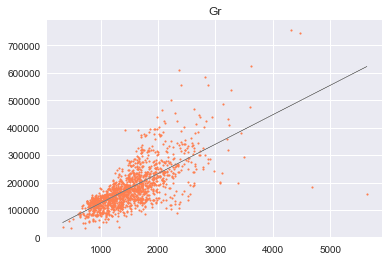

In [172]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

X = train_temp['GrLivArea'].values.reshape(-1,1)
Y = train_temp['SalePrice']

ols.fit(X, Y)   #### What happen if we remove the 'reshape' method? 
coef = ols.coef_
intc = ols.intercept_

plt.scatter(train_temp['GrLivArea'], train_temp['SalePrice'], s = 3, color = 'coral')
plt.plot(X, X * coef + intc, color = 'grey', linewidth = 0.5)
plt.title('Gr')

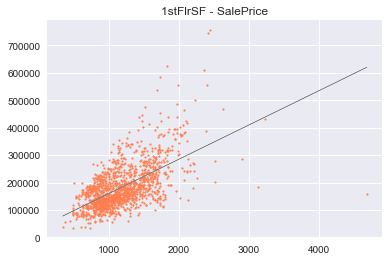

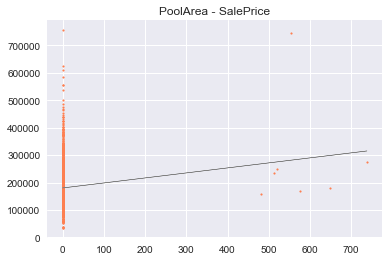

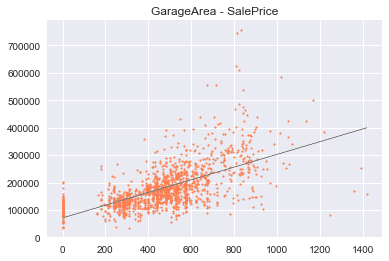

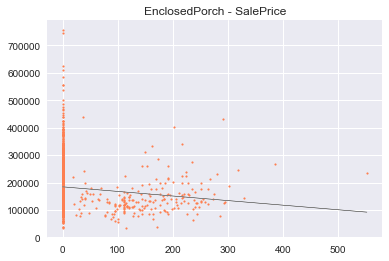

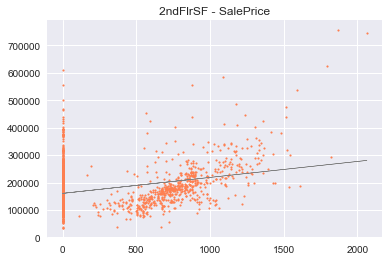

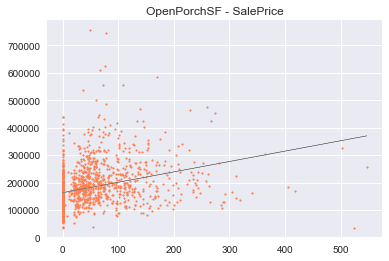

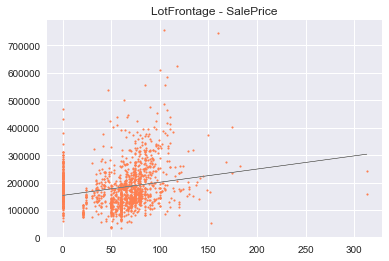

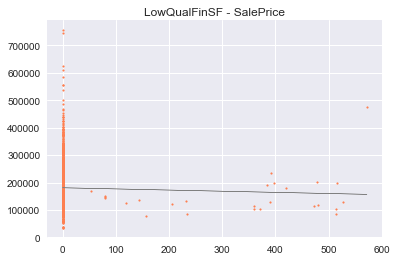

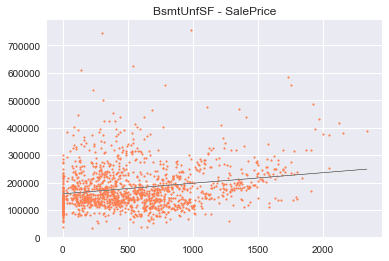

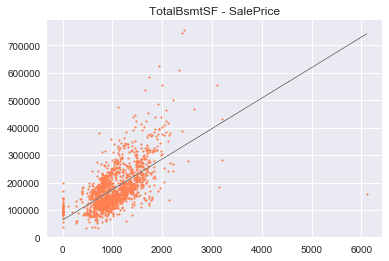

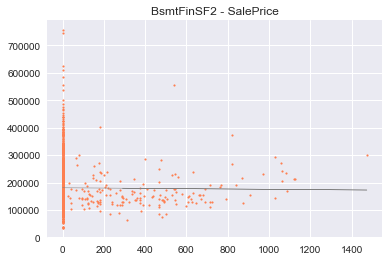

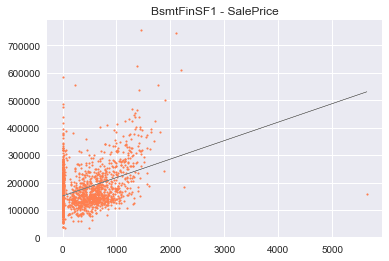

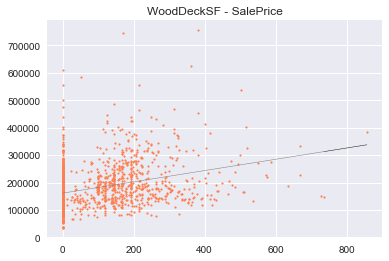

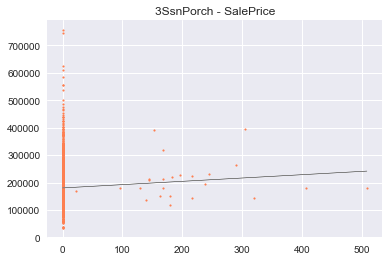

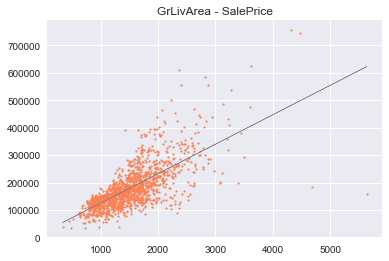

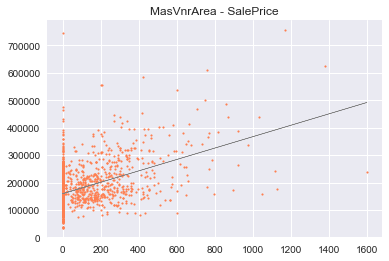

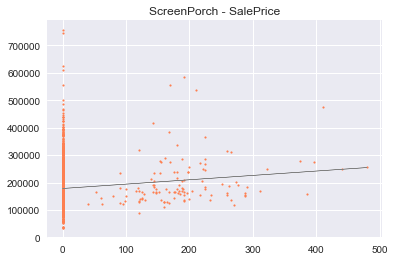

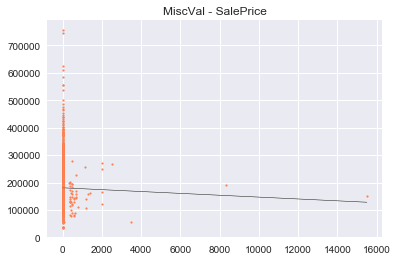

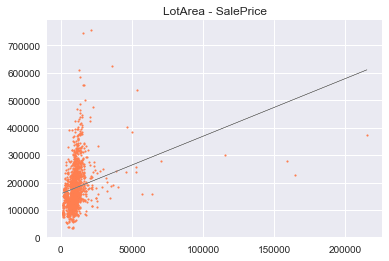

In [173]:
#Simple Linear Regression by each numerical variable
from sklearn import linear_model
ols = linear_model.LinearRegression()

for i in list(numerical_set):
    X = train_temp[i].values.reshape(-1,1)
    Y = train_temp['SalePrice']
    ols.fit(X, Y)
    plt.figure()
    plt.scatter(train_temp[i], train_temp['SalePrice'], color = 'coral', s = 3)
    plt.plot(X, X * ols.coef_ + ols.intercept_, color = 'grey', linewidth = 0.5)
    plt.title(i + ' - SalePrice')

In [179]:
import statsmodels.api as sm
model = sm.OLS(train_temp['SalePrice'], train_temp[list(numerical_set)])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1630.
Date:                Wed, 22 Aug 2018   Prob (F-statistic):               0.00
Time:                        12:31:18   Log-Likelihood:                -17681.
No. Observations:                1460   AIC:                         3.540e+04
Df Residuals:                    1443   BIC:                         3.549e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
1stFlrSF         24.7492      7.184      3.445

In [183]:
X = np.array(train_temp[list(numerical_set)])
y = np.array(train_temp['SalePrice']).reshape(-1,1)
ols.fit(X, y)
ols.score(X,y)  #R^2

0.694940546995779

In [174]:
for i in list(score_set):
    print(i)
    print(np.unique(train_temp[i]))

BsmtCond
['Fa' 'Gd' 'None' 'Po' 'TA']
Fence
['GdPrv' 'GdWo' 'MnPrv' 'MnWw' 'None']
BsmtQual
['Ex' 'Fa' 'Gd' 'None' 'TA']
HeatingQC
['Ex' 'Fa' 'Gd' 'Po' 'TA']
ExterQual
['Ex' 'Fa' 'Gd' 'TA']
OverallCond
[1 2 3 4 5 6 7 8 9]
FireplaceQu
['Ex' 'Fa' 'Gd' 'None' 'Po' 'TA']
GarageCond
['Ex' 'Fa' 'Gd' 'None' 'Po' 'TA']
ExterCond
['Ex' 'Fa' 'Gd' 'Po' 'TA']
OverallQual
[ 1  2  3  4  5  6  7  8  9 10]
PavedDrive
['N' 'P' 'Y']
Electrical
['FuseA' 'FuseF' 'FuseP' 'Mix' 'None' 'SBrkr']
Utilities
['AllPub' 'NoSeWa']
GarageFinish
['Fin' 'None' 'RFn' 'Unf']
PoolQC
['Ex' 'Fa' 'Gd' 'None']
GarageQual
['Ex' 'Fa' 'Gd' 'None' 'Po' 'TA']
BsmtFinType2
['ALQ' 'BLQ' 'GLQ' 'LwQ' 'None' 'Rec' 'Unf']
BsmtFinType1
['ALQ' 'BLQ' 'GLQ' 'LwQ' 'None' 'Rec' 'Unf']
Functional
['Maj1' 'Maj2' 'Min1' 'Min2' 'Mod' 'Sev' 'Typ']
KitchenQual
['Ex' 'Fa' 'Gd' 'TA']
BsmtExposure
['Av' 'Gd' 'Mn' 'No' 'None']


In [175]:
#Score variable - Ordinal arranging
PoolQC = {'Ex' : 3, 'Fa' : 2, 'Gd' : 1, 'None' : 0}
BsmtFinType2 = {'ALQ' : 5, 'BLQ' : 4, 'GLQ' : 6, 'LwQ' : 2, 'None' : 0, 'Rec' : 3, 'Unf' : 1}
GarageCond = {'Ex' : 5, 'Fa' : 2, 'Gd' : 4, 'None' : 0, 'Po' : 1, 'TA' : 3}
KitchenQual = {'Ex' : 4, 'Fa' : 1, 'Gd' : 3, 'TA' : 2}
Functional = {'Maj1' : 3, 'Maj2' : 2, 'Min1' : 6, 'Min2' : 5, 'Mod' : 4, 'Sev' : 1, 'Typ' : 7}
Electrical = {'FuseA' : 4, 'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1, 'None' : 0, 'SBrkr' : 5}
BsmtQual = {'Ex' : 4, 'Fa' : 1, 'Gd' : 2, 'None' : 0, 'TA' : 3}
Utilities = {'AllPub' : 2,'NoSeWa' : 1}
HeatingQC = {'Ex' : 5, 'Fa' : 4, 'Gd' : 3,'Po' : 1, 'TwA' : 2}
GarageQual = {'Ex' : 5,'Fa' : 2,'Gd' : 4,'None' : 0,'Po' : 1,'TA' : 3}
BsmtExposure = {'Av' : 3,'Gd' : 4,'Mn' : 2,'No' : 1,'None' : 0}
BsmtFinType1 = {'ALQ' : 5,'BLQ' :4,'GLQ' : 6,'LwQ' : 2,'None' : 0,'Rec' : 3,'Unf' : 1}
BsmtCond = {'Fa' :2,'Gd' : 4,'None' : 0,'Po' : 1,'TA' : 3}
GarageFinish = {'Fin' : 3,'None' : 0,'RFn' : 2,'Unf' : 1}
FireplaceQu = {'Ex' : 5,'Fa' : 2,'Gd' : 4,'None' : 0,'Po' : 1,'TA' : 3}
Fence = {'GdPrv' : 4,'GdWo' : 2,'MnPrv' : 3,'MnWw' : 1,'None' : 0}
ExterCond = {'Ex' : 4,'Fa' : 1,'Gd' : 3,'Po' : 0,'TA' : 2}
PavedDrive = {'N' : 0,'P' : 1,'Y' : 2}
ExterQual = {'Ex' : 4,'Fa' : 1,'Gd' : 3,'TA' : 2}

In [176]:
train_temp['PoolQC'] = train_temp['PoolQC'].map(lambda x: PoolQC.get(x,0))
train_temp['BsmtFinType2'] = train_temp['BsmtFinType2'].map(lambda x: BsmtFinType2.get(x,0))
train_temp['GarageCond'] = train_temp['GarageCond'].map(lambda x: GarageCond.get(x,0))
train_temp['KitchenQual'] = train_temp['KitchenQual'].map(lambda x: KitchenQual.get(x,0))
train_temp['Functional'] = train_temp['Functional'].map(lambda x: Functional.get(x,0))
train_temp['Electrical'] = train_temp['Electrical'].map(lambda x: Electrical.get(x,0))
train_temp['BsmtQual'] = train_temp['BsmtQual'].map(lambda x: BsmtQual.get(x,0))
train_temp['Utilities'] = train_temp['Utilities'].map(lambda x: Utilities.get(x,0))
train_temp['HeatingQC'] = train_temp['HeatingQC'].map(lambda x: HeatingQC.get(x,0))
train_temp['GarageQual'] = train_temp['GarageQual'].map(lambda x: GarageQual.get(x,0))
train_temp['BsmtExposure'] = train_temp['BsmtExposure'].map(lambda x: BsmtExposure.get(x,0))
train_temp['BsmtFinType1'] = train_temp['BsmtFinType1'].map(lambda x: BsmtFinType1.get(x,0))
train_temp['BsmtCond'] = train_temp['BsmtCond'].map(lambda x: BsmtCond.get(x,0))
train_temp['GarageFinish'] = train_temp['GarageFinish'].map(lambda x: GarageFinish.get(x,0))
train_temp['FireplaceQu'] = train_temp['FireplaceQu'].map(lambda x: FireplaceQu.get(x,0))
train_temp['Fence'] = train_temp['Fence'].map(lambda x: Fence.get(x,0))
train_temp['ExterCond'] = train_temp['ExterCond'].map(lambda x: ExterCond.get(x,0))
train_temp['PavedDrive'] = train_temp['PavedDrive'].map(lambda x: PavedDrive.get(x,0))
train_temp['ExterQual'] = train_temp['ExterQual'].map(lambda x: ExterQual.get(x,0))

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [177]:
train_temp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,2,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,2,3,1,6,706.0,1,0.0,150.0,856.0,GasA,5,Y,5,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,7,0,0,Attchd,2003.0,2,2.0,548.0,3,3,2,0,61,0,0,0,0,0,0,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,2,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,2,3,4,5,978.0,1,0.0,284.0,1262.0,GasA,5,Y,5,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,7,1,3,Attchd,1976.0,2,2.0,460.0,3,3,2,298,0,0,0,0,0,0,0,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,2,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,2,3,2,6,486.0,1,0.0,434.0,920.0,GasA,5,Y,5,920,866,0,1786,1.0,0.0,2,1,3,1,3,6,7,1,3,Attchd,2001.0,2,2.0,608.0,3,3,2,0,42,0,0,0,0,0,0,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,2,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216.0,1,0.0,540.0,756.0,GasA,3,Y,5,961,756,0,1717,1.0,0.0,1,0,3,1,3,7,7,1,4,Detchd,1998.0,1,3.0,642.0,3,3,2,0,35,272,0,0,0,0,0,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,2,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,2,3,3,6,655.0,1,0.0,490.0,1145.0,GasA,5,Y,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,3,9,7,1,3,Attchd,2000.0,2,3.0,836.0,3,3,2,192,84,0,0,0,0,0,0,None,0,12,2008,WD,Normal,250000


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


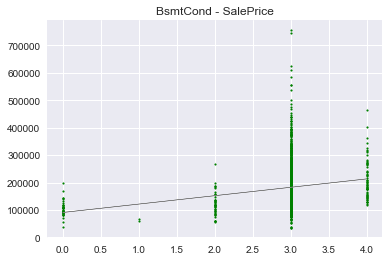

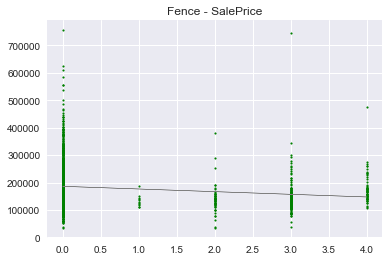

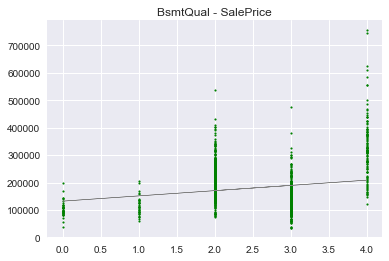

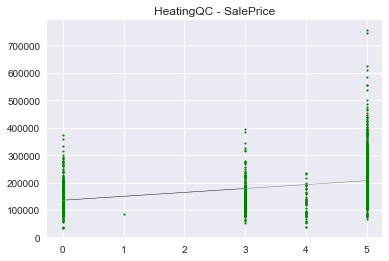

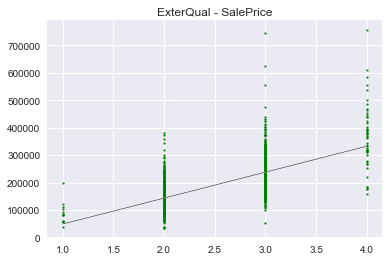

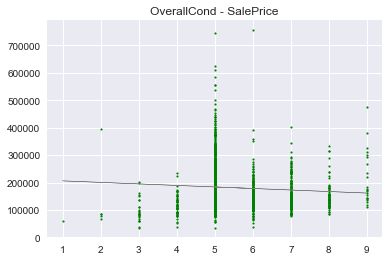

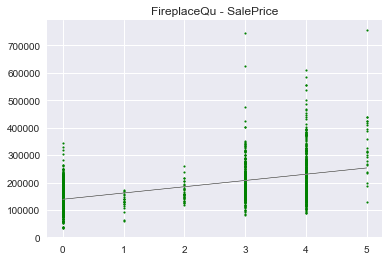

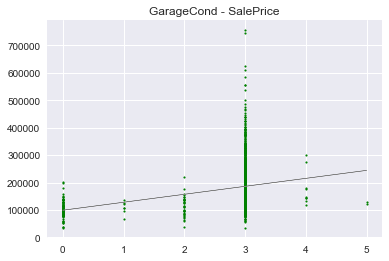

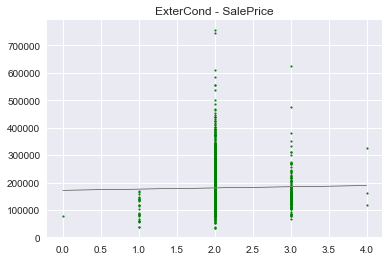

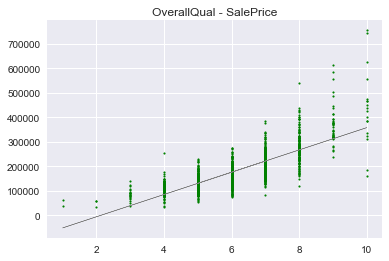

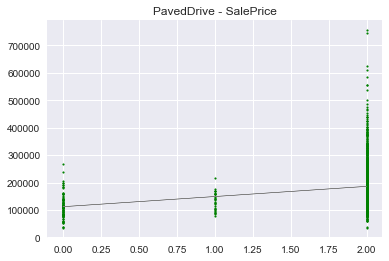

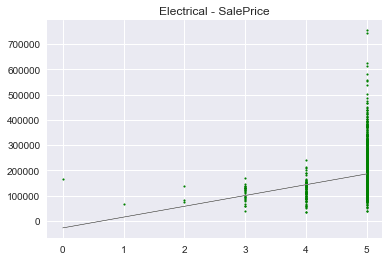

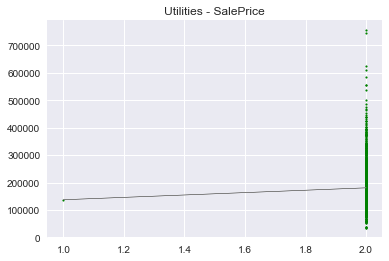

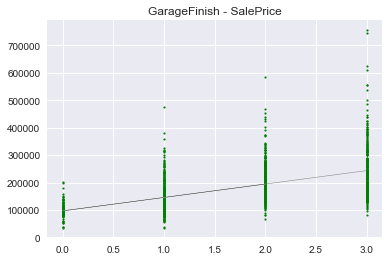

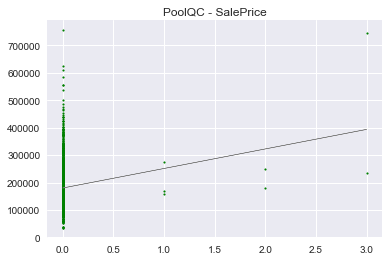

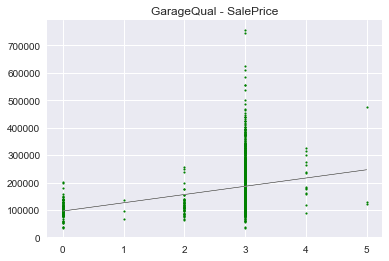

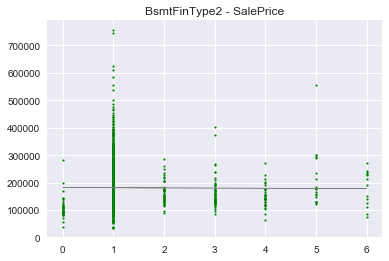

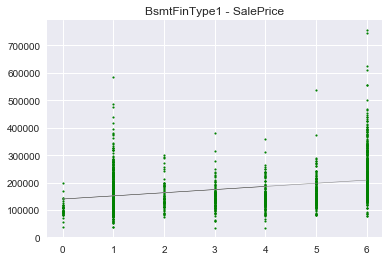

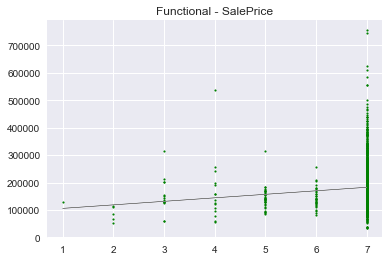

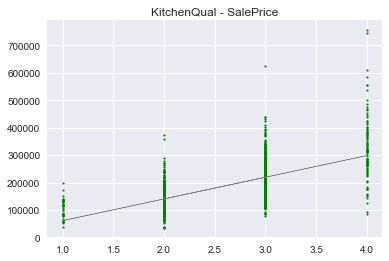

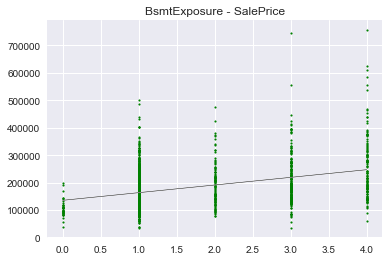

In [178]:
#Simple Linear Regression by each score variable

for i in list(score_set):
    X = train_temp[i].values.reshape(-1,1)
    Y = train_temp['SalePrice']
    ols.fit(X, Y)
    plt.figure()
    plt.scatter(train_temp[i], train_temp['SalePrice'], color = 'green', s = 3)
    plt.plot(X, X * ols.coef_ + ols.intercept_, color = 'grey', linewidth = 0.5)
    plt.title(i + ' - SalePrice')

In [181]:
import statsmodels.api as sm
model = sm.OLS(train_temp['SalePrice'], train_temp[list(score_set)])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1460.
Date:                Wed, 22 Aug 2018   Prob (F-statistic):               0.00
Time:                        12:31:40   Log-Likelihood:                -17608.
No. Observations:                1460   AIC:                         3.526e+04
Df Residuals:                    1439   BIC:                         3.537e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
BsmtCond     -1.312e+04   2519.385     -5.207   

In [182]:
X = np.array(train_temp[list(score_set)])
y = np.array(train_temp['SalePrice']).reshape(-1,1)
ols.fit(X, y)
ols.score(X,y)  #R^2

0.7237820238187537

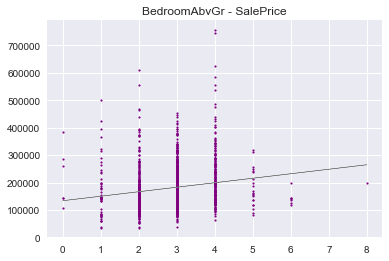

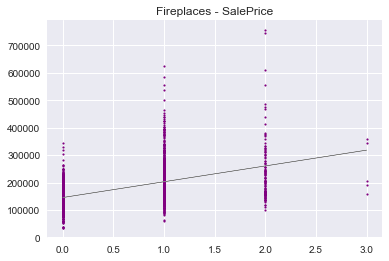

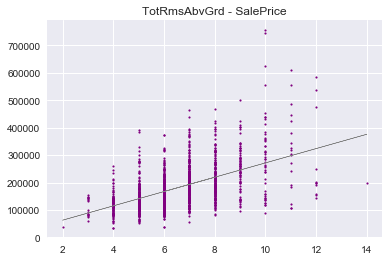

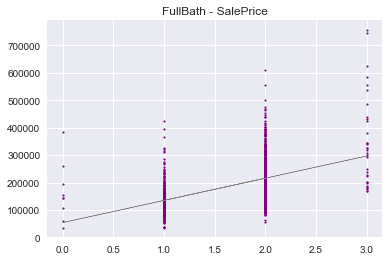

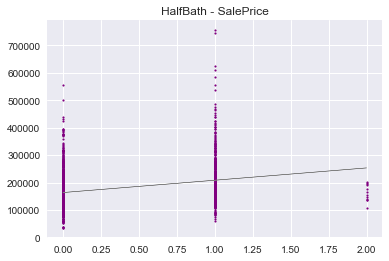

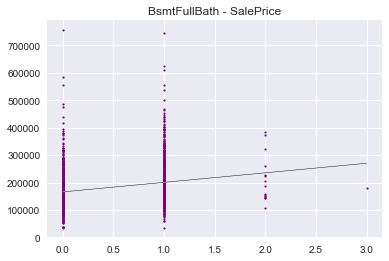

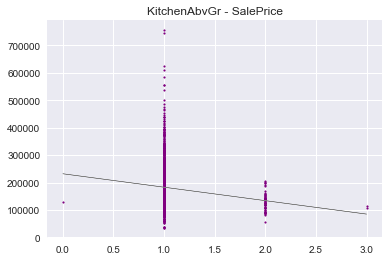

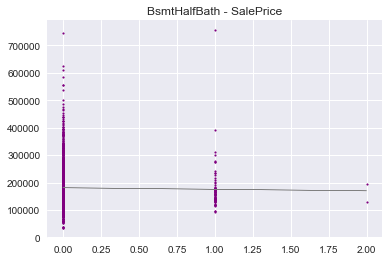

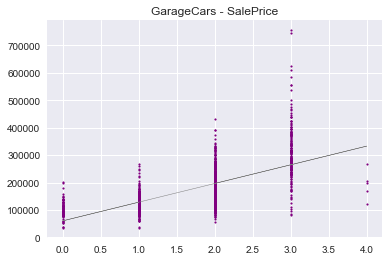

In [185]:
#Simple Linear Regression by each counting variable

for i in list(counting_set):
    X = train_temp[i].values.reshape(-1,1)
    Y = train_temp['SalePrice']
    ols.fit(X, Y)
    plt.figure()
    plt.scatter(train_temp[i], train_temp['SalePrice'], color = 'purple', s = 3)
    plt.plot(X, X * ols.coef_ + ols.intercept_, color = 'grey', linewidth = 0.5)
    plt.title(i + ' - SalePrice')

In [186]:
model = sm.OLS(train_temp['SalePrice'], train_temp[list(counting_set)])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     2809.
Date:                Wed, 22 Aug 2018   Prob (F-statistic):               0.00
Time:                        12:37:19   Log-Likelihood:                -17748.
No. Observations:                1460   AIC:                         3.551e+04
Df Residuals:                    1451   BIC:                         3.556e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
BedroomAbvGr -1.607e+04   2049.761     -7.841   

In [187]:
X = np.array(train_temp[list(counting_set)])
y = np.array(train_temp['SalePrice']).reshape(-1,1)
ols.fit(X, y)
ols.score(X,y)  #R^2

0.6693260287668354

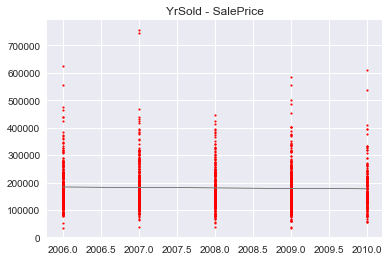

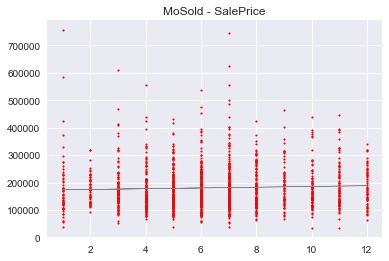

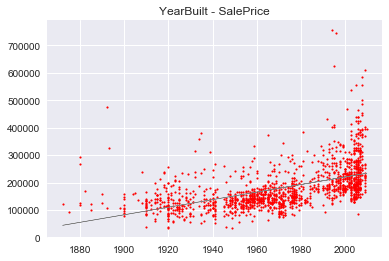

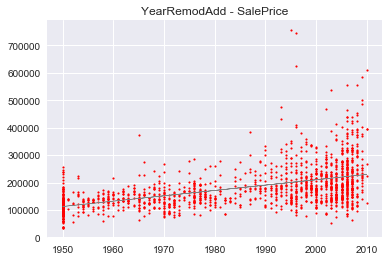

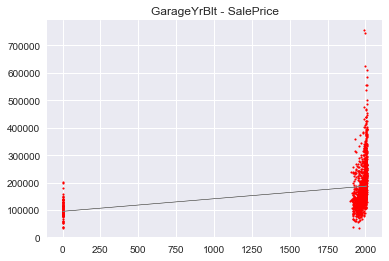

In [189]:
#Simple Linear Regression by each date variable

for i in list(date_set):
    X = train_temp[i].values.reshape(-1,1)
    Y = train_temp['SalePrice']
    ols.fit(X, Y)
    plt.figure()
    plt.scatter(train_temp[i], train_temp['SalePrice'], color = 'red', s = 3)
    plt.plot(X, X * ols.coef_ + ols.intercept_, color = 'grey', linewidth = 0.5)
    plt.title(i + ' - SalePrice')

In [190]:
model = sm.OLS(train_temp['SalePrice'], train_temp[list(date_set)])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     2488.
Date:                Wed, 22 Aug 2018   Prob (F-statistic):               0.00
Time:                        12:39:28   Log-Likelihood:                -18227.
No. Observations:                1460   AIC:                         3.646e+04
Df Residuals:                    1455   BIC:                         3.649e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
YrSold       -1889.9830     81.450    -23.204   

In [192]:
X = np.array(train_temp[list(date_set)])
y = np.array(train_temp['SalePrice']).reshape(-1,1)
ols.fit(X, y)
ols.score(X,y)  #R^2

0.3518492048622154

In [196]:
for i in list(preference_set):
    print(i)
    print(np.unique(train_temp[i]))

LandSlope
['Gtl' 'Mod' 'Sev']
GarageType
['2Types' 'Attchd' 'Basment' 'BuiltIn' 'CarPort' 'Detchd' 'None']
RoofStyle
['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']
Alley
['Grvl' 'None' 'Pave']
LotConfig
['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
MasVnrType
['BrkCmn' 'BrkFace' 'None' 'Stone']
Exterior2nd
['AsbShng' 'AsphShn' 'Brk Cmn' 'BrkFace' 'CBlock' 'CmentBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Other' 'Plywood' 'Stone' 'Stucco' 'VinylSd'
 'Wd Sdng' 'Wd Shng']
MSSubClass
[ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190]
Foundation
['BrkTil' 'CBlock' 'PConc' 'Slab' 'Stone' 'Wood']
Neighborhood
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
SaleType
['COD' 'CWD' 'Con' 'ConLD' 'ConLI' 'ConLw' 'New' 'Oth' 'WD']
MiscFeature
['Gar2' 'None' 'Othr' 'Shed' 'TenC']
SaleCondition
['Abnorml

In [22]:

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
dataset = datasets.load_iris()
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(dataset.data, dataset.target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True]
[2 1 1 1]


In [35]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(dataset.data, dataset.target)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.05169208 0.0712282  0.27219284 0.60488688]


In [38]:
train_temp[list(numerical_set)].head()

,1stFlrSF,PoolArea,GarageArea,EnclosedPorch,2ndFlrSF,OpenPorchSF,LotFrontage,LowQualFinSF,BsmtUnfSF,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,WoodDeckSF,3SsnPorch,GrLivArea,MasVnrArea,ScreenPorch,MiscVal,LotArea
0,856,0,548.0,0,854,61,65.0,0,150.0,856.0,0.0,706.0,0,0,1710,196.0,0,0,8450
1,1262,0,460.0,0,0,0,80.0,0,284.0,1262.0,0.0,978.0,298,0,1262,0.0,0,0,9600
2,920,0,608.0,0,866,42,68.0,0,434.0,920.0,0.0,486.0,0,0,1786,162.0,0,0,11250
3,961,0,642.0,272,756,35,60.0,0,540.0,756.0,0.0,216.0,0,0,1717,0.0,0,0,9550
4,1145,0,836.0,0,1053,84,84.0,0,490.0,1145.0,0.0,655.0,192,0,2198,350.0,0,0,14260


In [53]:
X = np.array(train_temp[list(numerical_set)])
y = np.array(train_temp['SalePrice']).reshape(-1,1)

In [66]:
list(numerical_set)

['1stFlrSF',
 'PoolArea',
 'GarageArea',
 'EnclosedPorch',
 '2ndFlrSF',
 'OpenPorchSF',
 'LotFrontage',
 'LowQualFinSF',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'WoodDeckSF',
 '3SsnPorch',
 'GrLivArea',
 'MasVnrArea',
 'ScreenPorch',
 'MiscVal',
 'LotArea']

In [54]:
ols.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
X

array([[  856.,     0.,   548., ...,     0.,     0.,  8450.],
       [ 1262.,     0.,   460., ...,     0.,     0.,  9600.],
       [  920.,     0.,   608., ...,     0.,     0., 11250.],
       ...,
       [ 1188.,     0.,   252., ...,     0.,  2500.,  9042.],
       [ 1078.,     0.,   240., ...,     0.,     0.,  9717.],
       [ 1256.,     0.,   276., ...,     0.,     0.,  9937.]])

In [85]:
X[:,2]

array([548., 460., 608., ..., 252., 240., 276.])

In [55]:
ols.coef_

array([[ 28.93679113, -72.37712026,  84.61583391, -57.35469347,
         36.98579986,  46.61375011,  24.91425671, -37.08190009,
          9.44648855,  31.13354132,   0.16919812,  21.51785465,
         55.39208358,  50.06800524,  28.8406909 ,  44.08496771,
         48.31886759,  -0.91022937,   0.15598014]])

In [77]:
a = ols.coef_[0,2];print(ols.coef_[0,2])

84.61583391302275


In [76]:
b = ols.intercept_;print(ols.intercept_)

[-11318.5775513]


In [96]:
ols.score(X,y)  #R^2

0.694940546995779

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1630.
Date:                Wed, 22 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:00:32   Log-Likelihood:                -17681.
No. Observations:                1460   AIC:                         3.540e+04
Df Residuals:                    1443   BIC:                         3.549e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
1stFlrSF         24.7492      7.184      3.445